Dataset Columns: Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


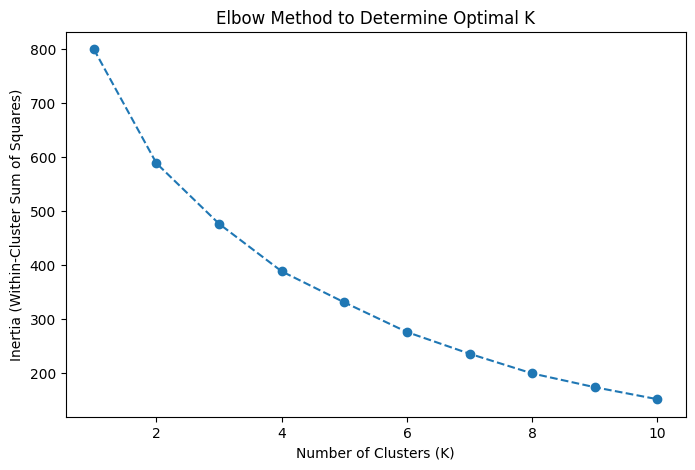

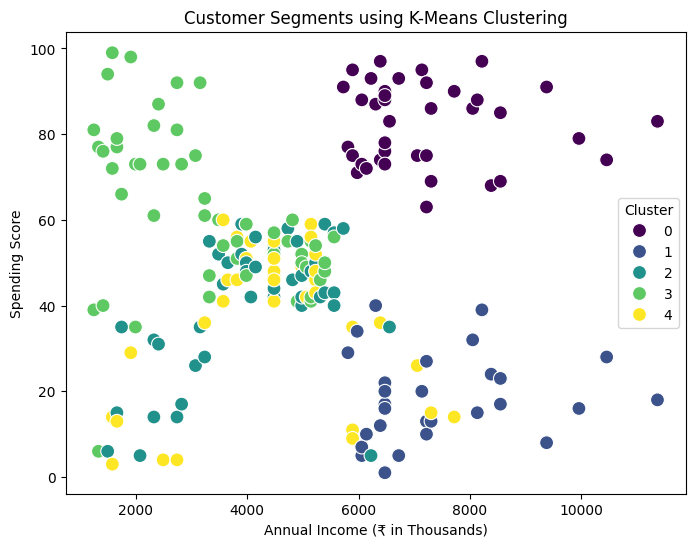


Cluster Summary (INR):
               Age    Gender  Annual Income (k₹)  Spending Score (1-100)
Cluster                                                                 
0        32.692308  0.461538         7182.692308               82.128205
1        36.482759  0.448276         7429.931034               18.000000
2        49.813953  0.000000         4086.302326               40.069767
3        24.907407  0.407407         3296.944444               61.203704
4        55.714286  1.000000         4455.914286               36.771429


In [ ]:
# Task-2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

file_path = "/content/Mall_Customers.csv"
df = pd.read_csv(file_path)
print("Dataset Columns:", df.columns)
print(df.head())
print("\nMissing Values:\n", df.isnull().sum())
df['Annual Income (k₹)'] = df['Annual Income (k$)'] * 83
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
features = ['Age', 'Gender', 'Annual Income (k₹)', 'Spending Score (1-100)']
df_cleaned = df[features].dropna()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method to Determine Optimal K")
plt.show()
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cleaned['Cluster'] = kmeans.fit_predict(df_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned['Annual Income (k₹)'], y=df_cleaned['Spending Score (1-100)'], hue=df_cleaned['Cluster'],
                palette='viridis', s=100)
plt.xlabel("Annual Income (₹ in Thousands)")
plt.ylabel("Spending Score")
plt.title("Customer Segments using K-Means Clustering")
plt.legend(title="Cluster")
plt.show()
cluster_summary = df_cleaned.groupby("Cluster").mean()
print("\nCluster Summary (INR):")
print(cluster_summary)
